#  Siniflandirma Yontemleri

## Logistic Regresyon

* Siniflandirma problemleri icin bagimli ve bagimsiz degiskenler arasindaki iliskiyi tanimlayan dogrusal model kurma amaclar.

* Yanit degiskeninin iki deger alabildigi durumlarda dogrusal regresyon kullanabiliriz fakat yanıt degiskeni ikiden fazla deger alma durumunda kullanamayız bu yuzden logistic regresyon tercih edilir.
* Logistic regresyon yapisi geregi cikti degerinin 0 ile 1 arasinda tutar.
* Bagimli degiskenin 1 olarak(baktigimiz sinifta olma durumu) tanimlanan degerinin gerceklesme olasiligi hesaplanir.

## Model

In [45]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()

In [47]:
df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* Bu datasette hastalarin ozellikleri ve seker hastasi olup olmadiklarinin bilgisi verilmiş
* Bİz Outcome 1 degerinie bakacagiz, yani diabet hastasi olma durumunu kontrol eddecegiz.

In [49]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

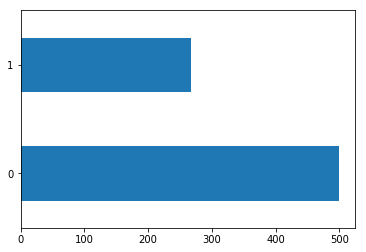

In [50]:
df["Outcome"].value_counts().plot.barh()

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [52]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [53]:
#statsmodel
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 30 Sep 2021   Pseudo R-squ.:                 0.05922
Time:                        15:37:14   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [54]:
# scikit-learn

In [55]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [56]:
loj_model.intercept_

array([-5.89139955])

In [57]:
loj_model.coef_

array([[ 1.17045952e-01,  2.83868025e-02, -1.68886321e-02,
         7.55752835e-04, -6.42670357e-04,  5.97559674e-02,
         6.77534900e-01,  7.24016631e-03]])

## Tahmin & Tuning

* Siniflandirma problemlerinde 1 ve 0 'in hangi durumlara karsilik olduguna dikkat edilmeli
* Genellikle olusma ihtimali az olan durum odaklanilan, yani degeri 1 olan durum olur

In [58]:
y_pred = loj_model.predict(X)


In [59]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [60]:
accuracy_score(y, y_pred)

0.7747395833333334

In [61]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [62]:
loj_model.predict(X)[0:10] # bize direkt siniflandirdigi degerleri gosterir

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [63]:
loj_model.predict_proba(X)[0:10]
# siniflandirma ihtimallerini gormek icin. Ilk deger 0, ikinci deger 1 olma ihtimali

array([[0.3504149 , 0.6495851 ],
       [0.91701315, 0.08298685],
       [0.22475237, 0.77524763],
       [0.92138186, 0.07861814],
       [0.16726482, 0.83273518],
       [0.7989777 , 0.2010223 ],
       [0.88018525, 0.11981475],
       [0.27814486, 0.72185514],
       [0.32058963, 0.67941037],
       [0.92271591, 0.07728409]])

In [64]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

* Degerleri kontrol ederek olasilik atamalarinda bir terslik var mi bakmis oluruz

In [65]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1] 

 * 1 olma durumu inceliyoruz, 1 olma olasiliklarini arraye topladik

In [66]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs] 


* kendi esik degerimizi secip 1 olma olasiliklarini yeniden bulduk
* genelde 0.5 default olarak esik deger olarak kullanilir

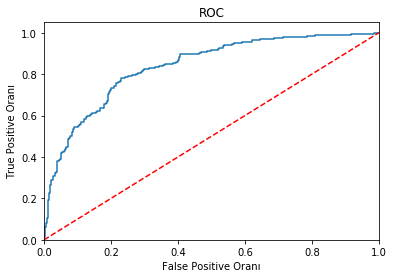

In [67]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [69]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [70]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [71]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean() # cv ile ideal accuracy_score

0.7748188405797102

## Naive Bayes

* Olasilik temelli bir modelleme teknigi. Amac belirli bir ornegin her bir sinifa ait olma olasiliginin kosullu olasilik temelli hesaplanmasidir.

* Hedef yanit degiskeni cok sinifliysa ve aralarinda eleme yapamiyorsak bunu kullanabiliriz.

### Model Tahmin

In [72]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)


In [75]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [76]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [77]:
y_pred = nb_model.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [79]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean() # dogrulanmis test skorumuz

0.775

## KNN

* Tahminler gozlem benzerligine gore yapilir.

* Knn basamaklari:
    - Komsu sayisi belrilenir
    - Bilinmeyen noktalar ile diger um noktalar arasindaki uzaklik hesaplanir
    - Uzakliklar siralanir ve belirlenen k sayisina gore en yakın k adeet gozlem secilir
    - Siniflandirirken en sik sinif tahmi olarak verilir

### Model & Tahmin

In [80]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [81]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)


In [82]:
y_pred = knn_model.predict(X_test)

In [83]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### Model Tuning

In [85]:
knn_params = {'n_neighbors':np.arange(1,50)}

In [86]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [87]:
knn_cv.best_params_

{'n_neighbors': 11}

In [88]:
knn_cv.best_score_

0.748637316561845

In [89]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11)
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [90]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [91]:
y_pred = knn_tuned.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred)

0.7316017316017316

## Destek Vektor Siniflandirici SVC

* Amac  iki sinif arasindaki ayrimin optimum olmasini saglayacak hiper duzlemi bulmaktir.

### Model Tuning

In [93]:
svc_params = { 'C': np.arange(1,10)}
svc = SVC(kernel = 'linear')
svc_cv = GridSearchCV(svc,
                      svc_params,
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2
                     )
svc_cv.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

* 'C': np.arange(0,10) olamaz cunku c degerinin 0 olmamasi gerekir.

In [94]:
svc_cv.best_params_

{'C': 5}

In [95]:
svc_tuned = SVC(kernel = 'linear', C = 5)
svc_tuned.fit(X_train, y_train)

SVC(C=5, kernel='linear')

In [96]:
y_pred = svc_tuned.predict(X_test)

In [97]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## RBF SVC

* Dogrusal olmayan svc

In [98]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [99]:
svc_model = SVC(kernel = 'rbf', ).fit(X_train, y_train) # rbf zaten ontanimli kernel

In [100]:
y_pred = svc_model.predict(X_test)

In [101]:
accuracy_score(y_test, y_pred)

0.7359307359307359

### Model tuning

In [102]:
svc_params = { 'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10, 50 ,100]}

In [103]:
svc = SVC()
svc_cv = GridSearchCV(svc, 
                      svc_params, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2 ).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [104]:
svc_cv.best_params_

{'C': 10, 'gamma': 0.0001}

In [105]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [106]:
y_pred = svc_tuned.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred)

0.7359307359307359

## Yapay Sinir Aglari

* Insan beyninin bilgi isleme seklini referans alan regresyon ve siniflandirma problemleri icin kullanilan kuvvetli makine ogrenmesi algoritmasidir.

### Model & Tahmin

In [108]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()

In [111]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [112]:
from sklearn.neural_network import MLPClassifier

In [113]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [114]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7359307359307359

### Model Tuning

In [115]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\90530\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='a

In [116]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [117]:
mlpc = MLPClassifier()
mlpc_cv = GridSearchCV(mlpc, 
                       mlpc_params, 
                       cv = 10, 
                       n_jobs = -1, 
                       verbose = 2).fit(X_train_scaled,y_train)
  

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [118]:
mlpc_cv.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (100, 100, 100),
 'solver': 'sgd'}

In [119]:
mlpc_tuned = MLPClassifier(activation = 'relu',
                          alpha = 0.005,
                          hidden_layer_sizes = (100, 100, 100),
                          solver = 'sgd').fit(X_train_scaled, y_train)

In [120]:
y_pred = mlpc_tuned.predict(X_test_scaled)

In [121]:
accuracy_score(y_test, y_pred)

0.7402597402597403

## Siniflandirma Agaclari CART

In [122]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [125]:
!pip install skompiler

In [126]:
from skompiler import skompile

In [127]:
print(skompile(cart_model.predict).to("python/code")) # kural yapisi bu sekilde formulize edilir

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[2] <= 65.0 else 0) if
    x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 0 if x[6] <= 0.39149999618530273 else 1) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[2] <= 69.5 else 0) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[2] <= 89.0 else 1) if x[5] <= 9.649999618530273 else 0 if x[1] <=
    133.0 else (0 if x[7] <= 57.5 else 1) if x[2] <= 73.0 else 0) if x[5] <=
    26.949999809265137 else (1 if x[

In [128]:
x = [34]

In [129]:
y_pred = cart_model.predict(X_test)

In [130]:
accuracy_score(y_test, y_pred)

0.696969696969697

### Model Tuning

In [131]:
?cart

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\90530\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int,

In [132]:
cart_grid = {'max_depth': range(1,10),
             'min_samples_split': list(range(2,50))
    
}

In [133]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, 
                       cart_grid, 
                       cv = 10, 
                       n_jobs = -1, 
                       verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [134]:
cart_cv.best_params_

{'max_depth': 5, 'min_samples_split': 19}

In [135]:
cart_tuned = DecisionTreeClassifier(max_depth = 5, 
                                    min_samples_split = 19).fit(X_train, y_train)

In [136]:
y_pred = cart_tuned.predict(X_test)

In [137]:
accuracy_score(y_test, y_pred)

0.7532467532467533

## Random Forests RF

### Model & Tahmin

In [138]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [141]:
y_pred = rf_model.predict(X_test)

In [142]:
accuracy_score(y_test, y_pred)

0.7359307359307359

### Model Tuning

In [143]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\90530\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" fo

In [144]:
rf_params = {'max_depth': [2,3,5,8,10],
             'max_features': [2,5,8],
             'n_estimators': [10,500,1000],
             'min_samples_split': [2,5,10]
    
}

In [145]:
rf_model = RandomForestClassifier()
rf_cv = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


In [146]:
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 500}

In [147]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                 max_features = 8,
                                 min_samples_split = 5,
                                 n_estimators = 1000).fit(X_train, y_train)

In [148]:
y_pred = rf_tuned.predict(X_test)

In [149]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [150]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

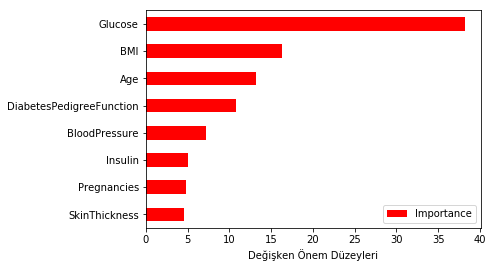

In [151]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## Gradient Bosting Machine GBM

### Model & Tahmin

In [152]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

In [154]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [155]:
y_pred = gbm_model.predict(X_test)


In [156]:
accuracy_score(y_test, y_pred)

0.7445887445887446

### Model Tuning

In [157]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\90530\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning r

In [158]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [159]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [160]:
gbm_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [161]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01, 
                                       max_depth = 5, 
                                       min_samples_split = 2, 
                                       n_estimators = 500).fit(X_train,y_train)

In [162]:
y_pred = gbm_tuned.predict(X_test)

In [163]:
accuracy_score(y_test, y_pred)

0.7359307359307359

## XGBoost

In [164]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Model & Tahmin

In [165]:
from xgboost import XGBClassifier

In [166]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[15:52:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [167]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
y_pred = xgb_model.predict(X_test)

In [169]:
accuracy_score(y_test, y_pred)

0.7359307359307359

### Model Tuning

In [170]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> _weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        c:\users\90530\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
        code, we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective

In [171]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [172]:
xgb = XGBClassifier()
xgb_cv = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[16:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [173]:
xgb_cv.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [174]:
xgb_tuned = XGBClassifier(learning_rate = 0.02, 
                          max_depth = 3, 
                          min_samples_split = 2, 
                          n_estimators = 100, 
                          subsample = 0.06).fit(X_train, y_train)

[16:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [175]:
y_pred = xgb_tuned.predict(X_test)

In [176]:
accuracy_score(y_test, y_pred)

0.7489177489177489

## Light GBM 

In [177]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [178]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [179]:
y_pred = lgbm_model.predict(X_test)

In [180]:
accuracy_score(y_test, y_pred)

0.7229437229437229

### Model Tuning

In [181]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\90530\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (

In [182]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [183]:
lgbm = LGBMClassifier()
lgbm_cv = GridSearchCV(lgbm, lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


In [184]:
lgbm_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [185]:
lgbm_tuned = LGBMClassifier(learning_rate = 0.05, 
                            max_depth = 3,
                            min_child_samples = 20, 
                            n_estimators = 100, 
                            subsample = 0.6).fit(X_train, y_train)

In [186]:
y_pred = lgbm_tuned.predict(X_test)

In [187]:
accuracy_score(y_test, y_pred)

0.7489177489177489

## CatBooost

In [188]:
url = 'https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/diabetes.csv'
data = pd.read_csv(url)
df = data.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [189]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879822	total: 1.72ms	remaining: 1.72s
1:	learn: 0.6843544	total: 3.06ms	remaining: 1.52s
2:	learn: 0.6805937	total: 4.74ms	remaining: 1.57s
3:	learn: 0.6766011	total: 6.26ms	remaining: 1.56s
4:	learn: 0.6721103	total: 7.58ms	remaining: 1.51s
5:	learn: 0.6681927	total: 8.87ms	remaining: 1.47s
6:	learn: 0.6642263	total: 10.3ms	remaining: 1.46s
7:	learn: 0.6603263	total: 11.6ms	remaining: 1.44s
8:	learn: 0.6563030	total: 13.1ms	remaining: 1.44s
9:	learn: 0.6528911	total: 14.8ms	remaining: 1.47s
10:	learn: 0.6488276	total: 16.5ms	remaining: 1.48s
11:	learn: 0.6455457	total: 18.1ms	remaining: 1.49s
12:	learn: 0.6419444	total: 19.6ms	remaining: 1.49s
13:	learn: 0.6374939	total: 21.1ms	remaining: 1.49s
14:	learn: 0.6340194	total: 22.8ms	remaining: 1.5s
15:	learn: 0.6304776	total: 24.1ms	remaining: 1.49s
16:	learn: 0.6267531	total: 25.6ms	remaining: 1.48s
17:	learn: 0.6238199	total: 27.5ms	remaining: 1.5s
18:	learn: 0.6204938	total: 29.6ms	remaining: 1.

In [190]:
y_pred = cat_model.predict(X_test)

In [191]:
accuracy_score(y_test, y_pred)

0.7402597402597403

### Model Tuning

In [192]:
?cat_model

Type:           CatBoostClassifier
String form:    <catboost.core.CatBoostClassifier object at 0x000001D4D24B3128>
File:           c:\users\90530\anaconda3\lib\site-packages\catboost\core.py
Docstring:     
Implementation of the scikit-learn API for CatBoost classification.

Parameters
----------
iterations : int, [default=500]
    Max count of trees.
    range: [1,+inf]
learning_rate : float, [default value is selected automatically for binary classification with other parameters set to default. In all other cases default is 0.03]
    Step size shrinkage used in update to prevents overfitting.
    range: (0,1]
depth : int, [default=6]
    Depth of a tree. All trees are the same depth.
    range: [1,+inf]
l2_leaf_reg : float, [default=3.0]
    Coefficient at the L2 regularization term of the cost function.
    range: [0,+inf]
model_size_reg : float, [default=None]
    Model size regularization coefficient.
    range: [0,+inf]
rsm : float, [default=None]
    Subsample ratio of columns w

In [193]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [194]:
catB = CatBoostClassifier()
cat_cv = GridSearchCV(catB, catb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863412	total: 4.24ms	remaining: 844ms
1:	learn: 0.6811322	total: 8.18ms	remaining: 810ms
2:	learn: 0.6753199	total: 11.8ms	remaining: 776ms
3:	learn: 0.6697717	total: 15.3ms	remaining: 752ms
4:	learn: 0.6642090	total: 18.8ms	remaining: 732ms
5:	learn: 0.6577038	total: 22.4ms	remaining: 725ms
6:	learn: 0.6522290	total: 26ms	remaining: 716ms
7:	learn: 0.6466015	total: 29.4ms	remaining: 705ms
8:	learn: 0.6408068	total: 32.9ms	remaining: 698ms
9:	learn: 0.6358218	total: 36.3ms	remaining: 690ms
10:	learn: 0.6300444	total: 39.6ms	remaining: 681ms
11:	learn: 0.6240992	total: 43.1ms	remaining: 675ms
12:	learn: 0.6196618	total: 46.7ms	remaining: 671ms
13:	learn: 0.6149237	total: 50.2ms	remaining: 666ms
14:	learn: 0.6093146	total: 53.8ms	remaining: 664ms
15:	learn: 0.6047282	total: 57.2ms	remaining: 658ms
16:	learn: 0.6013242	total: 60.7ms	remaining: 653ms
17:	learn: 0.5958624	total: 64.2ms	remaining: 650ms
18:	learn: 0.59

In [195]:
cat_cv.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [196]:
catB_tuned = CatBoostClassifier(depth = 8, iterations = 200, learning_rate = 0.01).fit(X_train, y_train)

0:	learn: 0.6863412	total: 4.53ms	remaining: 902ms
1:	learn: 0.6811322	total: 8.4ms	remaining: 831ms
2:	learn: 0.6753199	total: 12.8ms	remaining: 841ms
3:	learn: 0.6697717	total: 16.2ms	remaining: 794ms
4:	learn: 0.6642090	total: 19.4ms	remaining: 757ms
5:	learn: 0.6577038	total: 23.9ms	remaining: 773ms
6:	learn: 0.6522290	total: 27ms	remaining: 745ms
7:	learn: 0.6466015	total: 30.3ms	remaining: 727ms
8:	learn: 0.6408068	total: 33.4ms	remaining: 708ms
9:	learn: 0.6358218	total: 36.8ms	remaining: 700ms
10:	learn: 0.6300444	total: 40ms	remaining: 688ms
11:	learn: 0.6240992	total: 43.2ms	remaining: 677ms
12:	learn: 0.6196618	total: 46.4ms	remaining: 667ms
13:	learn: 0.6149237	total: 49.5ms	remaining: 658ms
14:	learn: 0.6093146	total: 53.2ms	remaining: 656ms
15:	learn: 0.6047282	total: 56.4ms	remaining: 649ms
16:	learn: 0.6013242	total: 59.5ms	remaining: 640ms
17:	learn: 0.5958624	total: 62.7ms	remaining: 634ms
18:	learn: 0.5903733	total: 66.2ms	remaining: 631ms
19:	learn: 0.5866505	total:

In [197]:
y_pred = catB_tuned.predict(X_test)

In [198]:
accuracy_score(y_test, y_pred)

0.7532467532467533

# Modellerin Kiyaslanmasi

In [201]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catB_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    if(isimler == "MLPClassifier"): #yapay sinir aglarinda X_test_scaled kullaniyorduk.
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 74.0260%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 74.4589%
----------------------------
GradientBoostingClassifier:
Accuracy: 73.5931%
----------------------------
CatBoostClassifier:
Accuracy: 75.3247%
----------------------------
LGBMClassifier:
Accuracy: 74.8918%
----------------------------
XGBClassifier:
Accuracy: 74.8918%
